<a href="https://colab.research.google.com/github/gabrieldepaiva/Projetos_Financas-Python/blob/main/Analise_Carteira_de_Acoes_Pessoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das Bibliotecas Necessárias

In [1]:
#@title
import pandas as pd
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
from google.colab.data_table import DataTable

## Escolha dos ativos que compõem a carteira

In [7]:
#@title
print('Pesquisa rápida de cada código das ações das empresas listadas na bolsa de valores')
DataBase = pd.read_csv('/content/sample_data/PlanilhaAuxiliardoColab-1 - Página1.csv')
DataTable(DataBase,include_index=False,num_rows_per_page=5)

Pesquisa rápida de cada código das ações das empresas listadas na bolsa de valores


,Ticket,Empresa
0,AALR3.SA,Centro de Imagem Diagnosticos SA
1,ABCB4.SA,Banco ABC Brasil SA
2,ABEV3.SA,Ambev SA
3,ADHM3.SA,Advanced Digital Health Medc Pretv SA
4,AGRO3.SA,Brasilagro Companhia Braslr Propds Agrcl
...,...,...
398,XPML11.SA,XP Malls Fundo de Investimento Imobiliario
399,XPPR11.SA,XP Properties FII - FII
400,XPSF11.SA,Xp Selection Fundo de Fundos Inv Imob Fii
401,XTED11.SA,TRX Edificios Corporativos FII


In [5]:
#@title
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:')
print('')

# Código Base para incluir os ativos na carteira
opcao = 1
carteira = []

carteira.append(input('Digite o nome do ativo. - '))
opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))

while True:
  if opcao == 1:
    carteira.append(input('Digite o nome do ativo. - '))
    opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))
  elif opcao != 1 and opcao != 2:
    opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
  else:
    break

print('')
print(f'Sua carteira é composta pelos seguintes ativos: {carteira}')

Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:

Digite o nome do ativo. - PETR4.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. - TAEE11.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. - BEES3.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 2

Sua carteira é composta pelos seguintes ativos: ['PETR4.SA', 'TAEE11.SA', 'BEES3.SA']


## Atribuindo os Pesos para esses Ativos

In [ ]:
#@title
lista = [carteira]

pesos = []

try:
  for loc, ativo in enumerate(carteira):
    pesos.append(float(input(f'Escreva o peso do ativo {carteira[loc]} (somente o número) - '))/100)
except:
  print('')
  print('\033[31mO valor digitado resultou em um erro.\033[m')
  print('Favor executar esta célula novamente!')

# pode ser que não precise dessa parte do código
else:
  if sum(pesos) != 1:
    print('')
    print(f'\033[31mA soma dos pesos resultou em {sum(pesos)*100}%, a soma deve ser 100%!\033[31m')
    print('Favor executar esta célula novamente!')

Escreva o peso do ativo PETR4.SA (somente o número) - 15
Escreva o peso do ativo TAEE11.SA (somente o número) - 30
Escreva o peso do ativo BEES3.SA (somente o número) - 55


## Importação da base de dados com as cotações diárias do Yahoo Finance

In [ ]:
#@title
inicio = input('A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> ')

BaseDados = pd.DataFrame()

for acao in carteira:
  BaseDados[acao] = data.DataReader(acao, data_source = 'yahoo',start = inicio)['Adj Close']

print('')
print('Importação dos dados realizada com sucesso!')

A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> 2020-7-1

Importação dos dados realizada com sucesso!


##### Resultado da tabela que foi gerada de forma parcial

In [ ]:
#@title
# Resultado da tabela que foi gerada parcialmente
BaseDados.head()

,PETR4.SA,TAEE11.SA,BEES3.SA
Date,,,
2020-07-01,21.709568,26.453655,5.983470
2020-07-02,22.059561,26.370119,5.953801
2020-07-03,21.979563,26.360836,5.943910
2020-07-06,22.509554,26.435093,5.953801
2020-07-07,22.229559,26.416527,5.924130


## Inclusão da coluna com o retorno diário da carteira 

In [ ]:
#@title
# Retorno acumulado de cada ação

retorno_acumulado = ((BaseDados/BaseDados.iloc[0])-1)*100

##### Tabela gerada com os resultados consolidados

In [ ]:
#@title
w = np.array(pesos)

ValorTotal = (retorno_acumulado * w)
ValorTotal['Retorno'] = ValorTotal.sum(axis=1)
ValorTotal.tail()

,PETR4.SA,TAEE11.SA,BEES3.SA,Retorno
Date,,,,
2020-12-10,4.221939,7.418065,-7.845091,3.794913
2020-12-11,3.938654,8.253338,-7.293572,4.898420
2020-12-14,4.083752,8.151753,-7.477411,4.758093
2020-12-15,4.242668,7.948578,-7.477411,4.713834
2020-12-16,4.477587,8.013651,-7.293572,5.197666


## Escolha dos Benchmarks

In [ ]:
#@title
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC')
print('')

benchmarks = []

q = 's'

q = input('Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - ')
if q == 's':

  # inclusão dos benchmarks
  escolha = 1

  benchmarks.append(input('Digite o código do benchmark. - '))
  escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))

  while True:
    if escolha == 1:
      benchmarks.append(input('Digite o nome do benchmark. - '))
      escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))
    elif opcao != 1 and opcao != 2:
      opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
    else:
      break

  print('')
  print(f'Os seguintes benchmarks foram incluídos : {benchmarks}')

Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC

Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - s
Digite o código do benchmark. - ^BVSP
Deseja adicionar outro? [1] Sim / [2] Não - 1
Digite o nome do benchmark. - ^GSPC
Deseja adicionar outro? [1] Sim / [2] Não - 2

Os seguintes benchmarks foram incluídos : ['^BVSP', '^GSPC']


##### Importação dos dados dos benchmarks que foram escolhidos

In [ ]:
#@title
#Os dados referentes aos benchmarks escolhidos serão importados para posterior análise

BaseDados2 = pd.DataFrame()

for indice in benchmarks:
  BaseDados2[indice] = data.DataReader(indice, data_source = 'yahoo',start = inicio)['Adj Close']

bmk_var_acum = ((BaseDados2/BaseDados2.iloc[0])-1)*100

print('Importação dos dados realizada com sucesso!')

Importação dos dados realizada com sucesso!


### Criação da Tabela Carteira X Benchmarks

In [ ]:
#@title
# Criação da tabela com o retorno acumulado da carteira e dos benchmarks selecionados

tabela_final = pd.DataFrame()

tabela_final['Sua Carteira'] = ValorTotal['Retorno']

for i in benchmarks:
  tabela_final[i] = bmk_var_acum[i]

##### Resultado da tabela criada

In [ ]:
#@title
tabela_final.head()

,Sua Carteira,^BVSP,^GSPC
Date,,,
2020-07-01,0.000000,0.000000,0.000000
2020-07-02,-0.125635,0.033263,0.454125
2020-07-03,-0.282350,0.584181,NaN
2020-07-06,0.258967,2.841907,2.049510
2020-07-07,-0.228281,1.619492,0.945484


## Visualizações e Análises dos Dados Importados e Normalizados

##### Visualização dos ativos que compõem a carteira

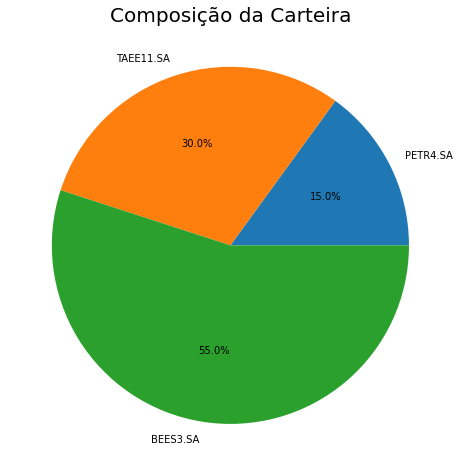

In [ ]:
#@title
# Visualização da Representatividade na carteira
listafinal = []

for numero in pesos:
  listafinal.append(numero * 200)

listafinal

x_list = listafinal
labels_list = carteira
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.pie(x_list,autopct='%1.1f%%',labels=labels_list)
plt.title('Composição da Carteira',size=20)
print('')

##### Visualização das variações da carteira e benchmarks acumulados

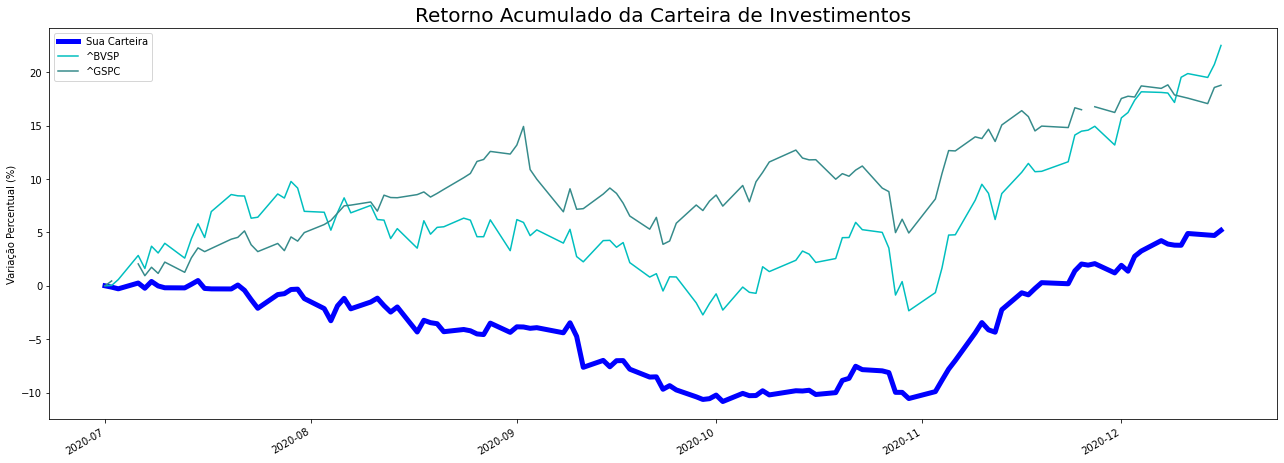

In [ ]:
#@title
# Visualização das variações da carteira e benchmarks acumulados
cores = ['c','#368B8B','#276666','#276666','#0FA7A7']

tabela_final['Sua Carteira'].plot(color='b',LineWidth=5,figsize=(22,8))
for loc,j in enumerate(benchmarks):
  tabela_final[j].plot(color=cores[loc])
plt.legend()
plt.title ('Retorno Acumulado da Carteira de Investimentos',size=20)
plt.xlabel('')
plt.ylabel('Variação Percentual (%)')
print('')

##### Lista de Resultados da carteira analisada

In [ ]:
#@title
BaseDados['Soma'] = BaseDados.sum(axis=1)

ret_cart = BaseDados['Soma'].pct_change().mean()*100
risco_cart = BaseDados['Soma'].pct_change().std()*100
linhas = BaseDados['Soma'].pct_change().count()
ret_acum_cart = tabela_final['Sua Carteira'].iloc[linhas]

print(f'Variação diária média da carteira: {round(ret_cart,2)}% a.p.')
print(f'Retorno acumulado da carteira: {round(ret_acum_cart,2)}% a.p.')
print(f'Risco da carteira: {round(risco_cart,2)}% a.p')
if q == 's':
  if '^BVSP' in tabela_final:
    ret_acum_ibov = tabela_final['^BVSP'].iloc[linhas]
    dci = round(((ret_acum_cart/ret_acum_ibov)-1)*100,2)
    print(f'Desempenho em relação ao Ibovespa: {dci}%.')
  else:
    print('')

Variação diária média da carteira: 0.19% a.p.
Retorno acumulado da carteira: 5.2% a.p.
Risco da carteira: 1.19% a.p
Desempenho em relação ao Ibovespa: -76.91%.
